In [1]:
import os 
import pandas as pd
import numpy as np 
import sys 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [2]:
TimeSeDT = pd.read_csv('ResData/TimeSerie_Rf=0.40_muf=0.60_tau=1.50.csv')

In [3]:
TimeSeDT.memory_usage().sum()/10**6
# TimeSeDT.info()


710.518528

In [4]:
grouped = TimeSeDT.groupby(['r','sigma','itr'])

In [5]:
#TimeSeDT[['r','sigma','itr']].value_counts()
#grouped.size()
#grouped.count()
TimeSeDT = TimeSeDT.join(grouped.agg(alpha_s = ('Inc_s',np.cumsum),
            alpha_f = ('Inc_f',np.cumsum),
            alpha_sf = ('Inc_sf',np.cumsum),
            alpha_fs = ('Inc_fs',np.cumsum)))
print(TimeSeDT.head(3))

     r  sigma  itr  t     S  I_s  I_f  R_s  R_f  I_f_s  I_s_f  R  Inc_s  \
0  0.6    0.0    0  0  9900   50   50    0    0      0      0  0      0   
1  0.6    0.0    0  1  9809   47   90   23   31      0      0  0     20   
2  0.6    0.0    0  2  9692   54  129   39   86      0      0  0     23   

   Inc_f  Inc_fs  Inc_sf  alpha_s  alpha_f  alpha_sf  alpha_fs  
0      0       0       0        0        0         0         0  
1     71       0       0       20       71         0         0  
2     94       0       0       43      165         0         0  


In [6]:
AttackRate=grouped[['Inc_s','Inc_f','Inc_sf','Inc_fs']].agg([np.sum]).rename(
    columns={'Inc_s':'alpha_s','Inc_f':'alpha_f','Inc_sf':'alpha_sf','Inc_fs':'alpha_fs'})
AttackRate.columns = AttackRate.columns.get_level_values(0)
AttackRate = AttackRate.groupby(['r','sigma']).mean().reset_index()
AttackRate['alpha_ts']=AttackRate['alpha_s']+AttackRate['alpha_fs']
AttackRate['alpha_tf']=AttackRate['alpha_f']+AttackRate['alpha_sf']
AttackRate['alpha_t']=AttackRate['alpha_s']+AttackRate['alpha_f']
AttackRate.iloc[:,2:] = AttackRate.iloc[:,2:]/10000
#AttackRate[AttackRate['sigma']==0]

In [7]:
Ratio_sf=AttackRate.pivot_table(values='alpha_ts',index='r',columns='sigma')/AttackRate.pivot_table(values='alpha_tf',index='r',columns='sigma')
Ratio_sf.shape

(10, 11)

<Figure size 432x288 with 0 Axes>

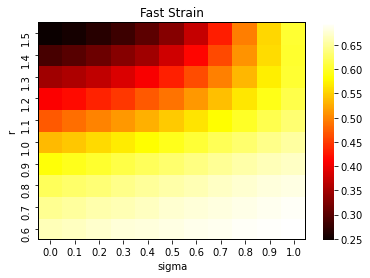

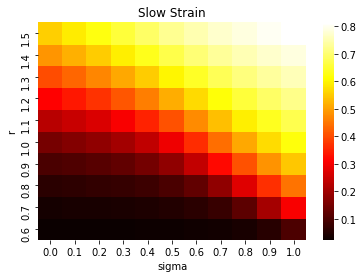

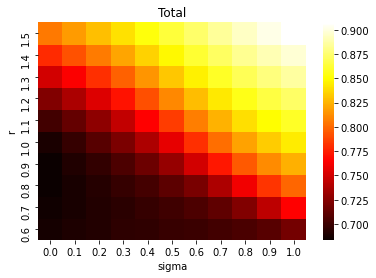

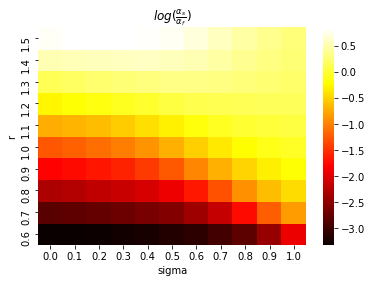

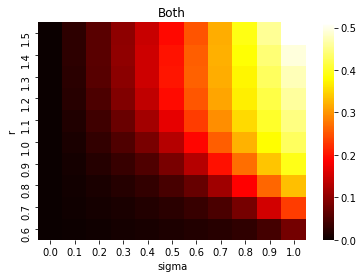

In [8]:
temp = AttackRate.pivot_table(values='alpha_tf',index='r',columns='sigma')
plt.figure()
fig, ax = plt.subplots()
fig.patch.set_alpha(1)
ax=sns.heatmap(temp,cmap='hot')
ax.axhline(y=0, color='k',linewidth=2)
ax.axhline(y=temp.shape[0], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=2)
ax.axvline(x=temp.shape[1], color='k',linewidth=2)
plt.title('Fast Strain')
ax.invert_yaxis()
# fig.savefig('figs/Attackrate_f_heatmap.png')
plt.show()
ax=sns.heatmap(AttackRate.pivot_table(values='alpha_ts',index='r',columns='sigma'),cmap='hot')
plt.title('Slow Strain')
ax.invert_yaxis()
# plt.savefig('figs/Attackrate_s_heatmap.png')
plt.show()

ax=sns.heatmap(AttackRate.pivot_table(values='alpha_t',index='r',columns='sigma'),cmap='hot')
plt.title('Total')
ax.invert_yaxis()
# plt.savefig('figs/Attackrate_Total_heatmap.png')
plt.show()

ax=sns.heatmap(np.log(Ratio_sf),cmap='hot')
plt.title('$log(\\frac{\\alpha_s}{\\alpha_f})$')
ax.invert_yaxis()
# plt.savefig('figs/Ratio_sf_heatmap.png')
plt.show()

ax=sns.heatmap(AttackRate.pivot_table(values='alpha_fs',index='r',columns='sigma')+
               AttackRate.pivot_table(values='alpha_sf',index='r',columns='sigma'),cmap='hot')
plt.title('Both')
ax.invert_yaxis()
# plt.savefig('figs/.png')
plt.show()



In [12]:
# for i in range(11):
#     plt.plot(np.log10(Ratio_sf.iloc[:,i]),'-')

# plt.ylabel('$\\frac{\\alpha_s}{\\alpha_f}$')
# plt.xlabel('r')
# # plt.yscale("log")
# plt.show()
# for i in range(10):
#     plt.plot(Ratio_sf.iloc[i,:])
# plt.ylabel('$\\frac{\\alpha_s}{\\alpha_f}$')
# plt.xlabel('sigma')
# plt.show()

In [9]:
groupdby_t = TimeSeDT.groupby(['r','sigma','t'])
AggOntime = groupdby_t.agg([np.mean,np.std,np.size]).reset_index()
AggOntime.head(3)

r sigma  t    itr                           S                      I_s  \
                  mean         std  size      mean        std  size    mean   
0  0.6   0.0  0  499.5  288.819436  1000  9900.000   0.000000  1000  50.000   
1  0.6   0.0  1  499.5  288.819436  1000  9816.882   9.146022  1000  53.717   
2  0.6   0.0  2  499.5  288.819436  1000  9705.339  20.844726  1000  55.952   

   ... alpha_s  alpha_f                  alpha_sf            alpha_fs       \
   ...    size     mean        std  size     mean  std  size     mean  std   
0  ...    1000    0.000   0.000000  1000      0.0  0.0  1000      0.0  0.0   
1  ...    1000   59.353   7.721529  1000      0.0  0.0  1000      0.0  0.0   
2  ...    1000  146.976  19.094607  1000      0.0  0.0  1000      0.0  0.0   

         
   size  
0  1000  
1  1000  
2  1000  

[3 rows x 54 columns]

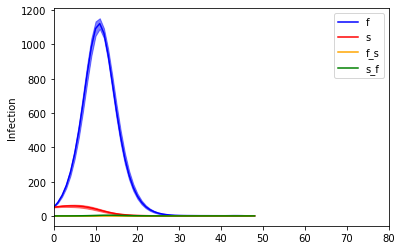

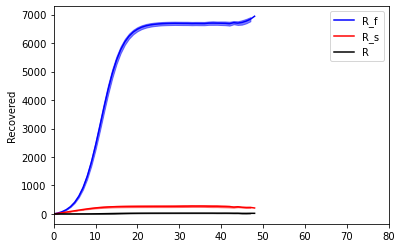

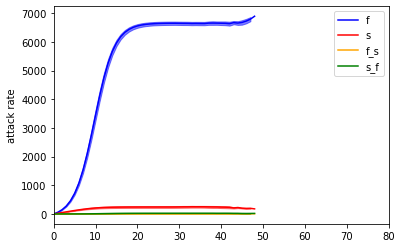

In [16]:
TempDT = AggOntime[(AggOntime["r"]==.6) & (AggOntime['sigma']==0.1)]


plt.plot(TempDT['t'],TempDT[('I_f','mean')],'-',color='blue',label='f')
plt.fill_between(TempDT['t'],TempDT[('I_f','mean')]-TempDT[('I_f','std')]/2,
                 TempDT[('I_f','mean')]+TempDT[('I_f','std')]/2, alpha=0.5,color='blue')
plt.plot(TempDT['t'],TempDT[('I_s','mean')],'-',color='red',label='s')
plt.fill_between(TempDT['t'],TempDT[('I_s','mean')]-TempDT[('I_s','std')]/2,
                 TempDT[('I_s','mean')]+TempDT[('I_s','std')]/2, alpha=0.5,color='red')
plt.plot(TempDT['t'],TempDT[('I_f_s','mean')],'-',color='orange',label='f_s')
plt.fill_between(TempDT['t'],TempDT[('I_f_s','mean')]-TempDT[('I_f_s','std')]/2,
                 TempDT[('I_f_s','mean')]+TempDT[('I_f_s','std')]/2, alpha=0.5,color='orange')
plt.plot(TempDT['t'],TempDT[('I_s_f','mean')],'-',color='green',label='s_f')
plt.fill_between(TempDT['t'],TempDT[('I_s_f','mean')]-TempDT[('I_s_f','std')]/2,
                 TempDT[('I_s_f','mean')]+TempDT[('I_s_f','std')]/2, alpha=0.5,color='green')
plt.xlim(0,80)
plt.legend(loc="upper right")
plt.ylabel('Infection')
plt.show()

plt.plot(TempDT['t'],TempDT[('R_f','mean')],'-',color='blue',label='R_f')
plt.fill_between(TempDT['t'],TempDT[('R_f','mean')]-TempDT[('R_f','std')]/2,
                 TempDT[('R_f','mean')]+TempDT[('R_f','std')]/2, alpha=0.5,color='blue')
plt.plot(TempDT['t'],TempDT[('R_s','mean')],'-',color='red',label='R_s')
plt.fill_between(TempDT['t'],TempDT[('R_s','mean')]-TempDT[('R_s','std')]/2,
                 TempDT[('R_s','mean')]+TempDT[('R_s','std')]/2, alpha=0.5,color='red')
plt.plot(TempDT['t'],TempDT[('R','mean')],'-',color='black',label='R')
plt.fill_between(TempDT['t'],TempDT[('R','mean')]-TempDT[('R','std')]/2,
                 TempDT[('R','mean')]+TempDT[('R','std')]/2, alpha=0.5,color='black')

plt.xlim(0,80)
plt.legend(loc="upper right")
plt.ylabel('Recovered')
plt.show()

plt.plot(TempDT['t'],TempDT[('alpha_f','mean')],'-',color='blue',label='f')
plt.fill_between(TempDT['t'],TempDT[('alpha_f','mean')]-TempDT[('alpha_f','std')]/2,
                 TempDT[('alpha_f','mean')]+TempDT[('alpha_f','std')]/2, alpha=0.5,color='blue')
plt.plot(TempDT['t'],TempDT[('alpha_s','mean')],'-',color='red',label='s')
plt.fill_between(TempDT['t'],TempDT[('alpha_s','mean')]-TempDT[('alpha_s','std')]/2,
                 TempDT[('alpha_s','mean')]+TempDT[('alpha_s','std')]/2, alpha=0.5,color='red')
plt.plot(TempDT['t'],TempDT[('alpha_fs','mean')],'-',color='orange',label='f_s')
plt.fill_between(TempDT['t'],TempDT[('alpha_fs','mean')]-TempDT[('alpha_fs','std')]/2,
                 TempDT[('alpha_fs','mean')]+TempDT[('alpha_fs','std')]/2, alpha=0.5,color='orange')
plt.plot(TempDT['t'],TempDT[('alpha_sf','mean')],'-',color='green',label='s_f')
plt.fill_between(TempDT['t'],TempDT[('alpha_sf','mean')]-TempDT[('alpha_sf','std')]/2,
                 TempDT[('alpha_sf','mean')]+TempDT[('alpha_sf','std')]/2, alpha=0.5,color='green')
plt.xlim(0,80)
plt.legend(loc="upper right")
plt.ylabel('attack rate')
plt.show()

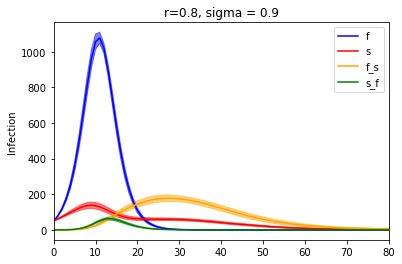

In [125]:
TempDT = AggOntime[(AggOntime["r"]==0.8) & (AggOntime['sigma']==0.9)]

plt.plot(TempDT['t'],TempDT[('I_f','mean')],'-',color='blue',label='f')
plt.fill_between(TempDT['t'],TempDT[('I_f','mean')]-TempDT[('I_f','std')]/2,
                 TempDT[('I_f','mean')]+TempDT[('I_f','std')]/2, alpha=0.5,color='blue')
plt.plot(TempDT['t'],TempDT[('I_s','mean')],'-',color='red',label='s')
plt.fill_between(TempDT['t'],TempDT[('I_s','mean')]-TempDT[('I_s','std')]/2,
                 TempDT[('I_s','mean')]+TempDT[('I_s','std')]/2, alpha=0.5,color='red')
plt.plot(TempDT['t'],TempDT[('I_f_s','mean')],'-',color='orange',label='f_s')
plt.fill_between(TempDT['t'],TempDT[('I_f_s','mean')]-TempDT[('I_f_s','std')]/2,
                 TempDT[('I_f_s','mean')]+TempDT[('I_f_s','std')]/2, alpha=0.5,color='orange')
plt.plot(TempDT['t'],TempDT[('I_s_f','mean')],'-',color='green',label='s_f')
plt.fill_between(TempDT['t'],TempDT[('I_s_f','mean')]-TempDT[('I_s_f','std')]/2,
                 TempDT[('I_s_f','mean')]+TempDT[('I_s_f','std')]/2, alpha=0.5,color='green')
plt.xlim(0,80)
plt.legend(loc="upper right")
plt.ylabel('Infection')
plt.title('r=0.8, sigma = 0.9')
plt.savefig('figs/timeseriInfection_r=0.8_sigma=0.9.png',dpi=500)
plt.show()


In [110]:
a = AggOntime[(AggOntime["t"]<61) & (AggOntime['sigma']==0.7)][[('t',''),('r',''),('I_f','mean')]]
a.columns = a.columns.get_level_values(0)
a=a.pivot_table(values='I_f',index='t',columns='r')

<Figure size 432x288 with 0 Axes>

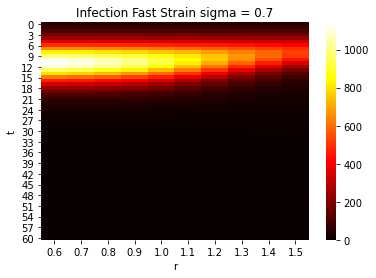

In [111]:
plt.figure()
fig, ax = plt.subplots()
# fig.patch.set_alpha(1)
im = sns.heatmap(a,cmap='hot')
plt.title('Infection Fast Strain sigma = 0.7')
plt.savefig('figs/InfectionTimeseriHeatmap_f_sigma=0.7.png',dpi=500)

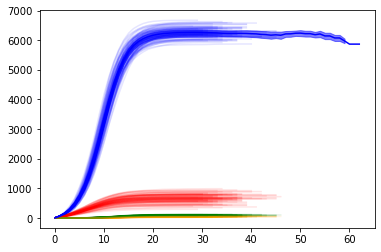

In [27]:
for i in range(100):
    DT=TimeSeDT[(TimeSeDT["r"]==0.8) & (TimeSeDT['sigma']==0.2)& (TimeSeDT['itr']==i)].iloc[:,3:]
    plt.plot(DT['t'],DT.iloc[:,13], alpha=0.1, color='red')
    plt.plot(DT['t'],DT.iloc[:,14], alpha=0.1, color='blue')
    plt.plot(DT['t'],DT.iloc[:,16], alpha=0.1, color='orange')
    plt.plot(DT['t'],DT.iloc[:,15], alpha=0.1, color='green')
    
plt.plot(TempDT['t'],TempDT[('alpha_f','mean')],'-',color='blue',label='f')
plt.fill_between(TempDT['t'],TempDT[('alpha_f','mean')]-TempDT[('alpha_f','std')]/2,
                 TempDT[('alpha_f','mean')]+TempDT[('alpha_f','std')]/2, alpha=0.5,color='blue')

/tmp/ipykernel_111069/1927932004.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x,x/(1+a*(x-1)),label = "sigma=%f"%a)


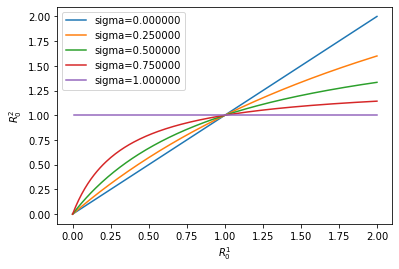

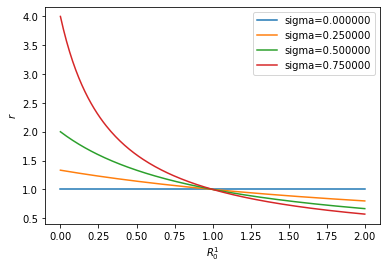

In [166]:
x= np.linspace(0,2,200)
aa = np.linspace(0,1,5)

for a in aa:
    plt.plot(x,x/(1+a*(x-1)),label = "sigma=%f"%a)
    plt.legend()

plt.xlabel("$R_0^1$")
plt.ylabel("$R_0^2$")
plt.show()

for a in aa[:-1]:
    plt.plot(x,1/(1+a*(x-1)),label = "sigma=%f"%a)
    plt.legend()
    
plt.xlabel("$R_0^1$")
plt.ylabel("$r$")
plt.show()

<Figure size 432x288 with 0 Axes>

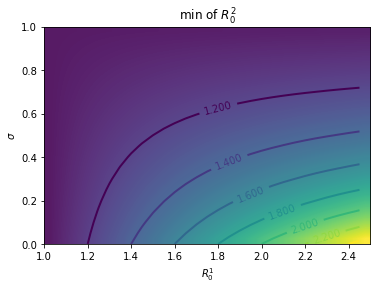

In [207]:
delta = 0.025
sigma = np.arange(0,1, 0.05)
R01 = np.arange(1, 2.5, 0.05)
X, Y = np.meshgrid(R01, sigma)

Z = X/(1+Y*(X-1))

plt.figure()
fig, ax = plt.subplots()
fig.patch.set_alpha(1)
im = ax.imshow(Z, interpolation='bilinear', origin='lower',alpha=0.9,
                extent=(1, 2.5, 0, 1))
CS = ax.contour(X, Y, Z, extend='both',extent=(1, 2.5, 0, 1),
                linewidths=2)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("$R_0^1$")
plt.ylabel("$\sigma$")
ax.set_title('min of $R_0^2 $')
plt.show()
fig.savefig('R_sigma_heatmap.png')

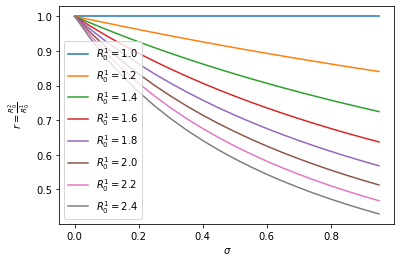

In [205]:
aa = np.arange(1,2.6,0.2)
fig = plt.figure()
# fig.patch.set_facecolor('blue')
fig.patch.set_alpha(1)
for R01 in aa:
    plt.plot(sigma,1/(1+sigma*(R01-1)),label = "$R_0^1=$%0.1f"%R01)
    plt.legend()

plt.ylabel("$r=\\frac{R_0^2}{R_0^1}$")
plt.xlabel("$\sigma$")
fig.savefig('Th_r_sigma.png',dpi=400,pad_inches=0.8)
plt.show()

<Figure size 432x288 with 0 Axes>

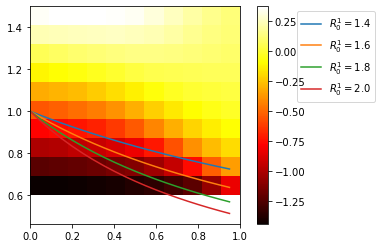

In [321]:
plt.figure()
fig, ax = plt.subplots()
fig.patch.set_alpha(1)
im = ax.imshow((np.log10(Ratio_sf)),cmap='hot', interpolation='none',extent=(0, 1,1.5,0.6))
fig.colorbar(im,ax=ax)
for R01 in aa[2:-2]:
    ax.plot(sigma,1/(1+sigma*(R01-1)),label = "$R_0^1=$%0.1f"%R01)

plt.legend(bbox_to_anchor=(1.25, 1.0), loc='upper left')
ax.invert_yaxis()

<AxesSubplot:xlabel='sigma', ylabel='r'>

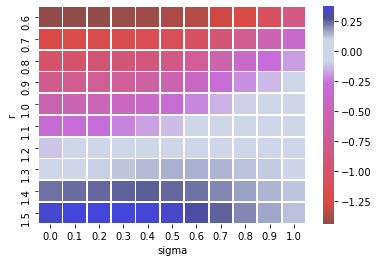

In [23]:

boundaries = [0, 0.1,0.65, 0.75,0.85, 0.95,1] # custom boundaries

# hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
hex_colors = [ '#914C49','#DB4A42', '#C66DDB','#CED7EA','#CED7EA', '#50518F','#4445DB']
colors=list(zip(boundaries, hex_colors))
custom_color_map = matplotlib.colors.LinearSegmentedColormap.from_list(
    name='custom_navy',colors=colors)

plt.figure()
sns.heatmap(
        data=np.log10(Ratio_sf),
        cmap=custom_color_map,
        linewidths=0.75)